<a href="https://colab.research.google.com/github/RishabhNegi1/Research-Stock-Prediction/blob/main/AMZN_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# Load the dataset
data = pd.read_csv('/content/AMZN.csv')


In [ ]:

# Convert Date column to datetime format and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Resample the data to get quarterly and yearly data
quarterly_data = data['Adj Close'].resample('Q').mean()
yearly_data = data['Adj Close'].resample('Y').mean()

# Prepare data for Random Forest
X_quarterly = np.arange(len(quarterly_data)).reshape(-1, 1)
y_quarterly = quarterly_data.values

X_yearly = np.arange(len(yearly_data)).reshape(-1, 1)
y_yearly = yearly_data.values


In [ ]:

# Fit Random Forest model on quarterly data
rf_model_quarterly = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_quarterly.fit(X_quarterly, y_quarterly)
quarterly_forecasted_values = rf_model_quarterly.predict(X_quarterly)

# Forecast the next 4 quarters (1 year ahead)
forecast_quarterly = rf_model_quarterly.predict(np.arange(len(quarterly_data), len(quarterly_data) + 4).reshape(-1, 1))

# Calculate error metrics for quarterly data
mae_quarterly = mean_absolute_error(y_quarterly, quarterly_forecasted_values)
rmse_quarterly = np.sqrt(mean_squared_error(y_quarterly, quarterly_forecasted_values))


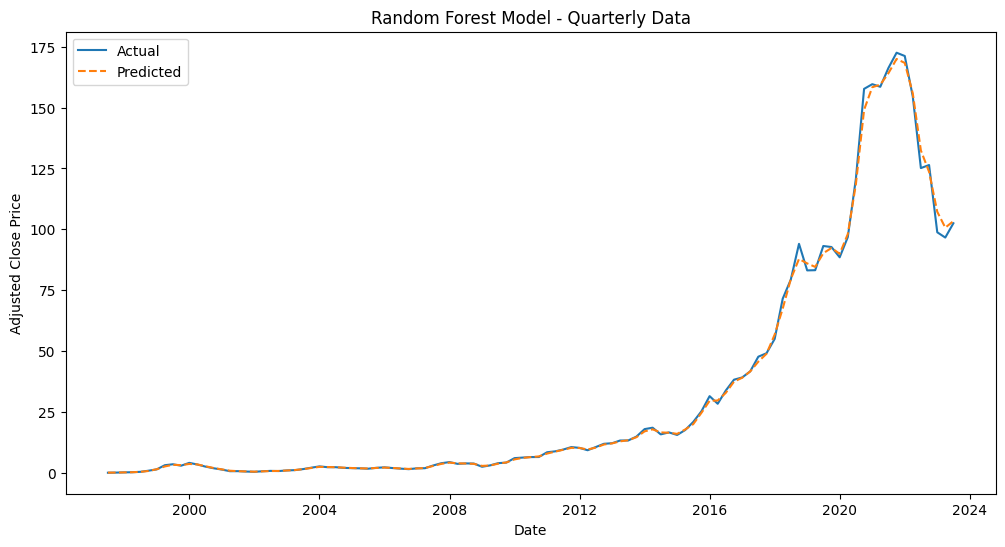

Quarterly Data - MAE: 0.8452499502975281
Quarterly Data - RMSE: 1.821558778200319
Quarterly Forecast: [103.35190923 103.35190923 103.35190923 103.35190923]


In [ ]:

# Plot actual vs predicted for quarterly data
plt.figure(figsize=(12, 6))
plt.plot(quarterly_data.index, y_quarterly, label='Actual')
plt.plot(quarterly_data.index, quarterly_forecasted_values, label='Predicted', linestyle='--')
plt.title('Random Forest Model - Quarterly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Quarterly Data - MAE:", mae_quarterly)
print("Quarterly Data - RMSE:", rmse_quarterly)
print("Quarterly Forecast:", forecast_quarterly)


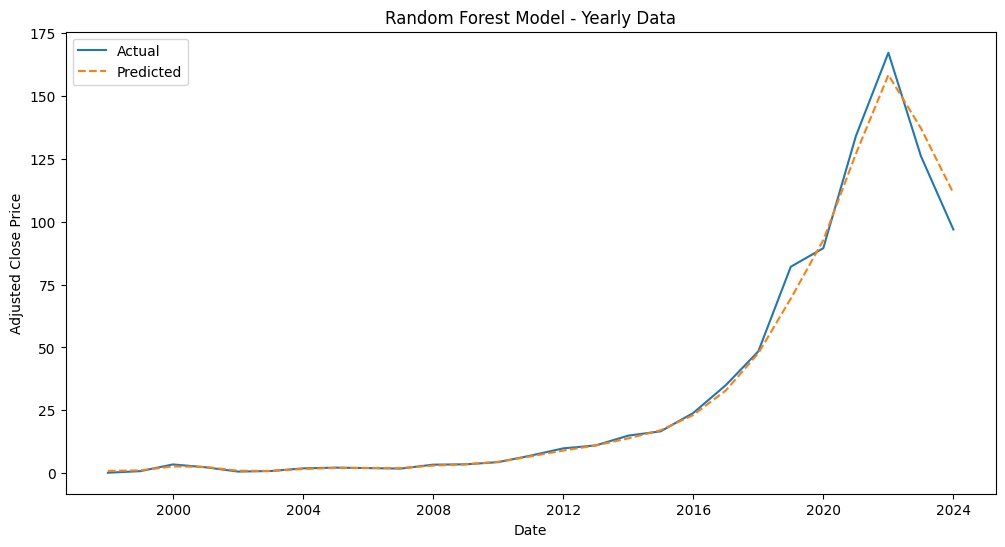

Yearly Data - MAE: 2.4898724194850153
Yearly Data - RMSE: 4.869353664609078
Yearly Forecast: [111.33934217 111.33934217]


In [ ]:

# Fit Random Forest model on yearly data
rf_model_yearly = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_yearly.fit(X_yearly, y_yearly)
yearly_forecasted_values = rf_model_yearly.predict(X_yearly)

# Forecast the next 2 years
forecast_yearly = rf_model_yearly.predict(np.arange(len(yearly_data), len(yearly_data) + 2).reshape(-1, 1))

# Calculate error metrics for yearly data
mae_yearly = mean_absolute_error(y_yearly, yearly_forecasted_values)
rmse_yearly = np.sqrt(mean_squared_error(y_yearly, yearly_forecasted_values))

# Plot actual vs predicted for yearly data
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, y_yearly, label='Actual')
plt.plot(yearly_data.index, yearly_forecasted_values, label='Predicted', linestyle='--')
plt.title('Random Forest Model - Yearly Data')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

print("Yearly Data - MAE:", mae_yearly)
print("Yearly Data - RMSE:", rmse_yearly)
print("Yearly Forecast:", forecast_yearly)
